# Dataverse - Bean and Brew - Sustainable Strategy

In [5]:
library(tidyverse)
#library(tidymodels)
#library(tidyclust)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 6)
#source("cleanup.R")

In [28]:
items <- read_csv("items.csv")
items

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 17 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): item_name, item_type, drink_temperature, drink_type
dbl (2): price, production_cost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


item_name,price,production_cost,item_type,drink_temperature,drink_type
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Espresso,3.00,0.80,Drink,Hot,Coffee
Americano,3.50,1.00,Drink,Hot,Coffee
Latte,4.50,1.20,Drink,Hot,Coffee
Cappuccino,4.25,1.15,Drink,Hot,Coffee
Flat White,4.75,1.25,Drink,Hot,Coffee
Mocha,4.80,1.40,Drink,Hot,Coffee
Iced Coffee,4.00,1.10,Drink,Cold,Coffee
Cold Brew,4.75,1.35,Drink,Cold,Coffee
Iced Latte,4.60,1.25,Drink,Cold,Coffee


In [29]:
sales <- read_csv("sales.csv")
sales

Rows: 32605 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): item_name, transaction_type, own_cup
dbl  (1): customer_id
lgl  (1): surcharge
date (1): date
time (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,time,item_name,transaction_type,own_cup,surcharge,customer_id
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>
2022-01-01,07:03:30,Cold Brew,Takeout,True,FALSE,26946
2022-01-01,07:30:58,Iced Coffee,Takeout,True,FALSE,24356
2022-01-01,08:32:23,Iced Latte,Takeout,False,FALSE,3760
2022-01-01,08:45:03,Latte,Dine-in,True,FALSE,5900
2022-01-01,09:03:47,Latte,Takeout,False,FALSE,11589
2022-01-01,10:02:30,Flat White,Takeout,True,FALSE,1786
2022-01-01,10:29:29,Iced Latte,Takeout,False,FALSE,904
2022-01-01,10:53:39,Flat White,Takeout,True,FALSE,4942
2022-01-01,10:59:50,Americano,Dine-in,True,FALSE,7692


In [30]:
coffee <- inner_join(items,sales)
coffee

Joining with `by = join_by(item_name)`


item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<time>,<chr>,<chr>,<lgl>,<dbl>
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,10:43:09,Takeout,False,FALSE,18500
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,15:26:48,Takeout,True,FALSE,11609
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-03,07:18:28,Dine-in,False,FALSE,10437
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-03,07:19:59,Takeout,False,FALSE,28495
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-05,09:04:35,Takeout,True,FALSE,18747
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-08,07:49:31,Dine-in,True,FALSE,24401
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-08,09:58:18,Dine-in,False,FALSE,2763
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-10,09:11:10,Takeout,False,FALSE,22482
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-11,07:48:32,Takeout,True,FALSE,9707


In [31]:
merch <- filter(coffee, item_type == "Merchandise")
merch

item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<date>,<time>,<chr>,<chr>,<lgl>,<dbl>
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-11,07:19:12,Takeout,N/A,FALSE,24356
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-12,09:52:37,Takeout,N/A,FALSE,14571
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-13,07:11:59,Dine-in,N/A,FALSE,24899
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-13,11:05:11,Takeout,N/A,FALSE,28805
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-15,11:54:42,Dine-in,N/A,FALSE,28857
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-20,09:38:23,Takeout,N/A,FALSE,7076
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-20,15:50:51,Takeout,N/A,FALSE,23550
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-22,08:57:56,Dine-in,N/A,FALSE,10167
Reusable Coffee Cup,15,6,Merchandise,N/A,NA,2022-01-23,11:12:48,Takeout,N/A,FALSE,20890


In [10]:
coffee_only <- coffee |> 
  filter(item_type != "Merchandise") |>
  mutate(
    drink_temperature = as_factor(drink_temperature),
    drink_type        = as_factor(drink_type),
    transaction_type  = as_factor(transaction_type),
    own_cup           = as.logical(own_cup)
  )
coffee_only

item_name,price,production_cost,item_type,drink_temperature,drink_type,date,time,transaction_type,own_cup,surcharge,customer_id
<chr>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<date>,<time>,<fct>,<lgl>,<lgl>,<dbl>
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,10:43:09,Takeout,FALSE,FALSE,18500
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-02,15:26:48,Takeout,TRUE,FALSE,11609
Espresso,3,0.8,Drink,Hot,Coffee,2022-01-03,07:18:28,Dine-in,FALSE,FALSE,10437
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-29,11:37:28,Dine-in,FALSE,FALSE,25413
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-30,07:47:35,Takeout,TRUE,FALSE,11586
Hot Chocolate,4.25,1.1,Drink,Hot,Other,2024-12-31,13:15:02,Takeout,TRUE,FALSE,11609


In [11]:
coffee_drink_type <- coffee_only|> 
  group_by(drink_temperature) |> 
  summarise(brought_cup = sum(own_cup == TRUE),not_brought_cups = sum(own_cup == FALSE ),proportion = mean(own_cup == TRUE), proportion_not_own_cup = mean(own_cup == FALSE))
coffee_drink_type

drink_temperature,brought_cup,not_brought_cups,proportion,proportion_not_own_cup
<fct>,<int>,<int>,<dbl>,<dbl>
Hot,10509,10109,0.5097003,0.4902997
Cold,2758,7085,0.2801991,0.7198009


##### Explanation of how drink_temperature could affect reusability of cups
The data suggests that hot drinks are much more likely to be ordered using a reusable cup than cold drinks. The proportion of customers bringing their own cup for hot beverages is around 51%, whereas for cold beverages it drops to about 28%. This pattern can be interpreted in several realistic ways:
###### Practicality and Habit
- Customers tend to associate reusable cups (e.g., travel mugs, thermoses) with hot drinks like coffee or tea. Many people already own insulated hot drink tumblers and routinely carry them, especially commuters. Therefore, they naturally use them when purchasing hot drinks.
- Cold beverages, however, are more often consumed on the go without preplanning, meaning customers are less likely to bring a cup specifically for a cold drink.
###### Type of Container Used
- Reusable hot drink mugs are widely available, standardized, and easy for shops to fill.
- Reusable containers for cold drinks (e.g., clear tumblers for iced drinks) are less commonly owned, and many customers may not think of bringing one.
- Some coffee shops also have stricter guidelines for filling customer-provided containers for iced/blended drinks, reducing incentive.
###### Seasonal/Comfort Motivation
- Hot drinks are often purchased during colder weather, when customers already carry bags, backpacks, or jackets—making it easy to carry a reusable cup.
- Cold drinks are often spontaneous purchases in warm weather (e.g., “I’m hot, I’ll grab an iced coffee”), so people may not have brought a reusable container with them.

###### Conclusion
Overall, the data indicates that hot drink customers engage in sustainable behavior more consistently, likely due to established habits, availability of suitable reusable containers, and the practical advantages of insulated travel mugs. Cold drink consumers show much lower reusability, suggesting that encouraging reusable cold drink tumblers (or offering incentives) could significantly reduce waste in that category.

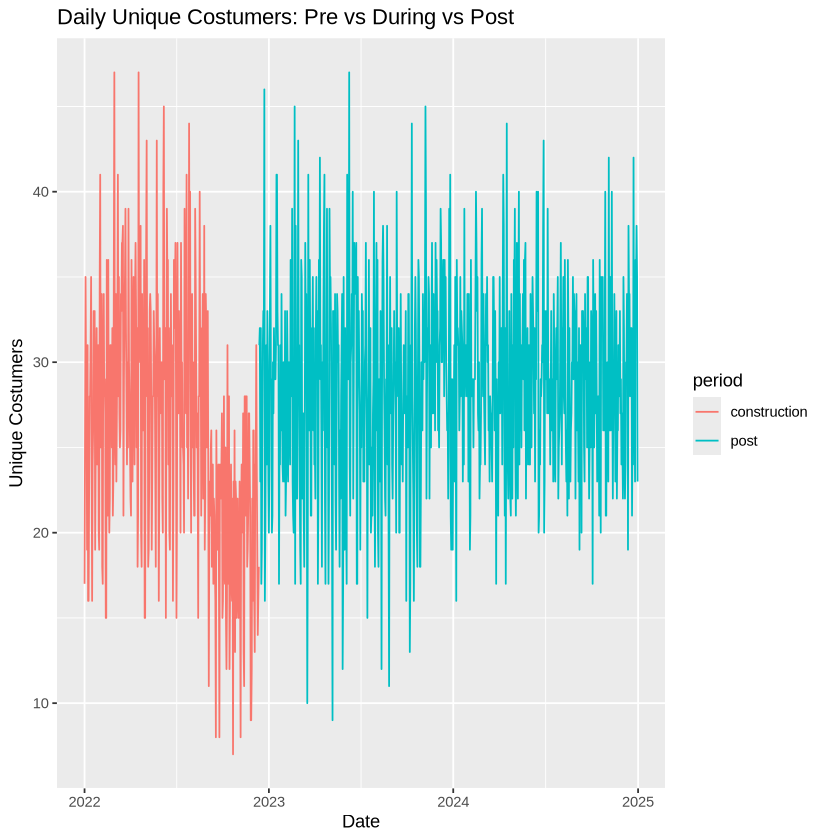

In [13]:
construction <- coffee |>
mutate(
    date=ymd(date),
    period=case_when(
           date<ymd("2022-01-01")~"pre",
           date>=ymd("2022-01-01")&date<=ymd("2022-12-12")~"construction",
           TRUE~"post"))

daily_customers <- construction |>
group_by(date, period) |>
summarise(unique_customers=n_distinct(customer_id), .groups="drop")

avg_customers <- daily_customers |>
group_by(period) |>
summarise(avg_daily_customer=mean(unique_customers))

ggplot(daily_customers, aes(date, unique_customers, color=period))+
geom_line()+
labs(title="Daily Unique Costumers: Pre vs During vs Post",
    x="Date",
    y="Unique Costumers")

The construction had no long-term negative effect on customer traffic, only short-term disruption.